In [1]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

import numpy as np
from matplotlib import pyplot as plt

**Create a training a test dataset for regression**

In [2]:
n_samples=1000
n_train=800

input_dim =1
output_dim =1
X=np.random.randn(n_samples,input_dim)
Y=np.zeros([n_samples,output_dim])

for iter in np.arange(n_samples):
  Y[iter,0]=np.sin(X[iter,0])

print(X.shape)
print(Y.shape)

(1000, 1)
(1000, 1)


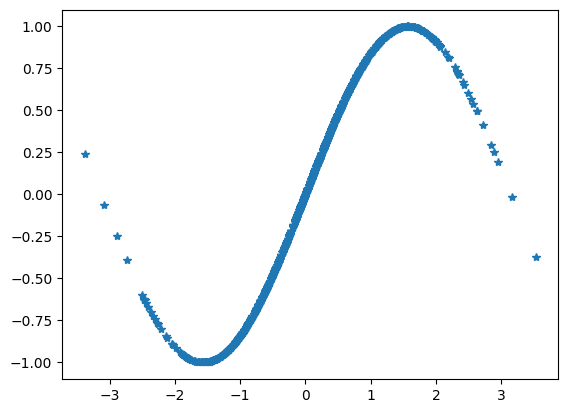

In [3]:
plt.plot(X,Y,'*')

(800, 1)
(800, 1)
(200, 1)
(200, 1)


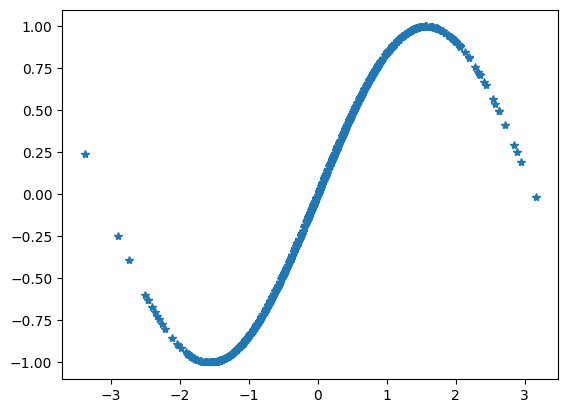

In [4]:
X_train=X[:n_train,:]
Y_train=Y[:n_train]

X_test=X[n_train:,:]
Y_test=Y[n_train:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

plt.plot(X_train,Y_train,'*')

**Create a small neural net**

In [5]:
model = Sequential()
model.add(Dense(8, activation='tanh', kernel_initializer='uniform', 	input_shape=(input_dim,)))
model.add(Dense(4, activation='tanh'))
model.add(Dense(output_dim, activation='tanh'))

**Set up the optimization parameters**

In [6]:
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, 	nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


**Train the neural net**

In [8]:
model.fit(X_train, Y_train, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
7/7 [==============================] - 4s 4ms/step - loss: 0.3865
Epoch 2/25
7/7 [==============================] - 0s 3ms/step - loss: 0.2622
Epoch 3/25
7/7 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 4/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0992
Epoch 5/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0665
Epoch 6/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 7/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 8/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 9/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 10/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 11/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 12/25
7/7 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 13/25
7/7 [==============================] - 0s 3ms/step - loss: 0.

**Prediction on a test set**

In [9]:
Y_pred=model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


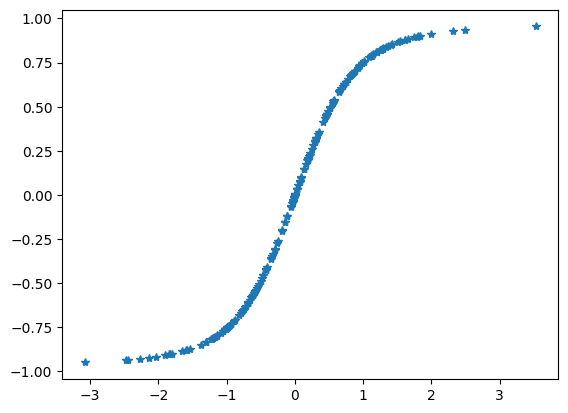

In [10]:
plt.plot(X_test,Y_pred,'*')